In [18]:
!pip install yfinance

In [19]:
import yfinance as yf

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
tick="WIPRO.NS"
start="2023-04-01"
end="2024-03-31"

In [22]:
data=yf.download(tick,start,end)
df=pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


Bollinger Bands

In [23]:
def bb(time_period):
   df["SMA"] = df["Close"].rolling(window=time_period).mean()
   df["std"]=df["Close"].rolling(window=time_period).std()
   df["UPPER_SMA"]=df["SMA"]+2*df["std"]
   df["LOWER_SMA"]=df["SMA"]-2*df["std"]
   plt.figure(figsize=(8,6),dpi=150)
   plt.title("Bollinger Bands for Wipro")
   plt.plot(df["Close"],label="Close")
   plt.plot(df["SMA"],label="SMA")
   plt.plot(df["UPPER_SMA"],label="Upper_Band")
   plt.plot(df["LOWER_SMA"],label="Lower_Band")
   plt.legend()
   plt.fill_between(df.index,df["UPPER_SMA"],df["LOWER_SMA"],alpha=0.2)
   
   

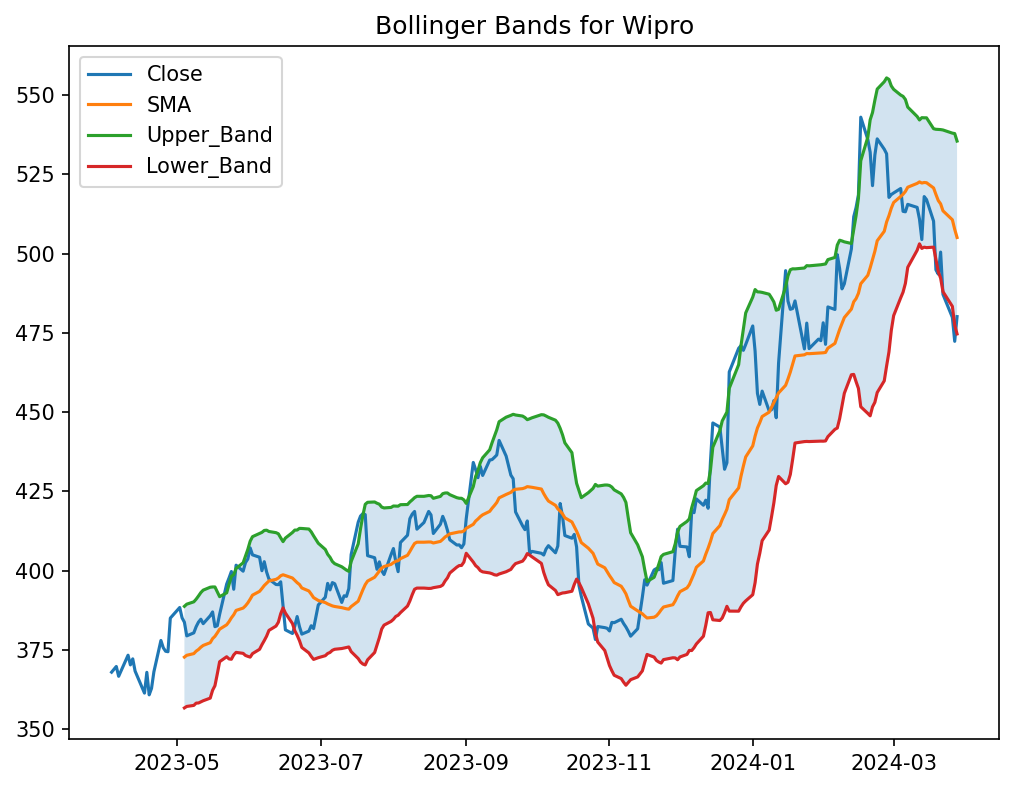

In [24]:
bb(20)

MACD

In [25]:
def ema(time_period,multiplier,value):
    df["SMA2"]=value.rolling(window=time_period).mean()
    df["EMA2"]=0
    for index in range(0,time_period):
        df["EMA2"][index]=df["SMA2"][index]
    for index in range(time_period,len(value)):
        df["EMA2"][index]=(df["EMA2"][index-1])*(1-multiplier)+(value[index])*multiplier
    return df["EMA2"]





C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\2559559159.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["EMA2"][index]=df["SMA2"][index]
C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\2559559159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA2"][index]=df["SMA2"][index]
C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\2559559159.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df["EMA2"][index]=df["SM

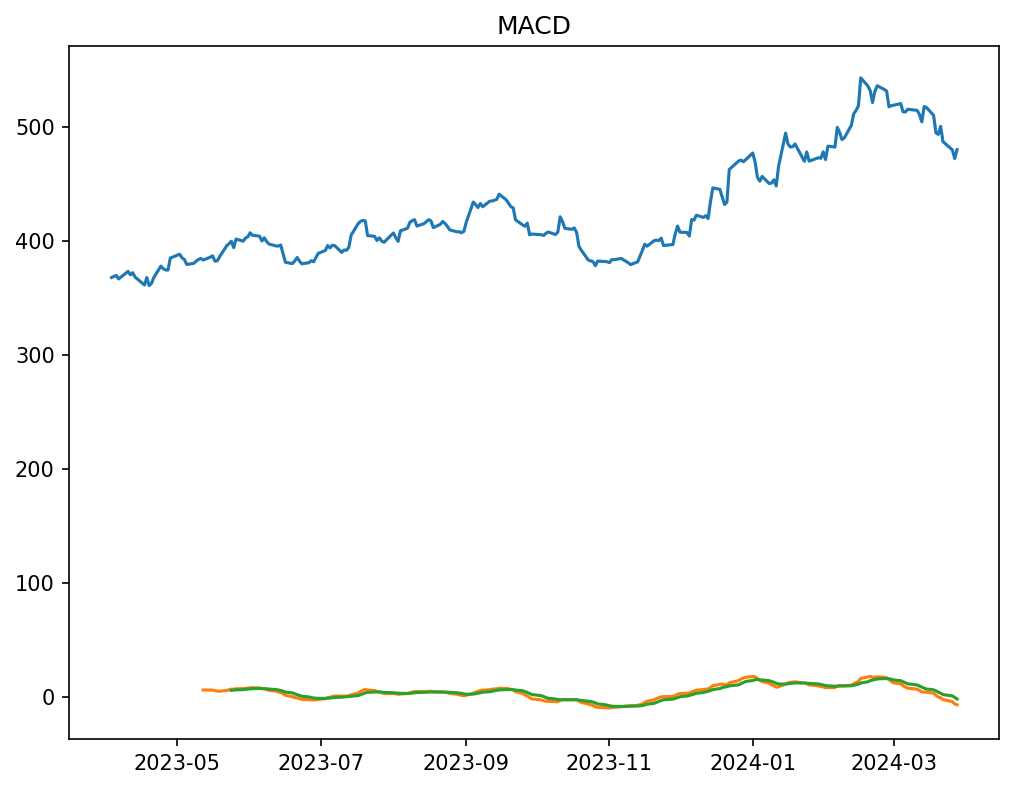

In [26]:
df2=pd.DataFrame()
df["EMA12"]=ema(12,2/13,df["Close"])
df["EMA26"]=ema(26,2/27,df["Close"])
df2["macd"]=df["EMA12"]-df["EMA26"]
df2.dropna(inplace=True)
def ema2(time_period,multiplier,value):
    df2["SMA2"]=value.rolling(window=time_period).mean()
    df2["EMA2"]=0
    for index in range(0,time_period):
        df2["EMA2"][index]=df2["SMA2"][index]
    for index in range(time_period,len(value)):
        df2["EMA2"][index]=(df2["EMA2"][index-1])*(1-multiplier)+(value[index])*multiplier
    return df2["EMA2"]
df2["signal"]=ema2(9,2/10,df2["macd"])
plt.figure(figsize=(8,6),dpi=150)
plt.title("MACD")
plt.plot(df["Close"])
plt.plot(df2["macd"])
plt.plot(df2["signal"])



Keltner Channel

In [27]:
def max(a,b):
    if(a>=b):
        return a
    else:
        return b


In [28]:
df["EMA20"]=ema(20,2/21,df["Close"])

C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\2559559159.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["EMA2"][index]=df["SMA2"][index]
C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\2559559159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMA2"][index]=df["SMA2"][index]
C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\2559559159.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df["EMA2"][index]=df["SM

In [29]:
n=len(df)
df["sum_tr"]=0
for index in range(0,n):
     df["sum_tr"][index]=max(max(df["High"][index]-df["Low"][index],abs(df["High"][index]-df["Close"][index-1])),abs(df["Low"][index]-df["Close"][index-1]))


C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\1143700265.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["sum_tr"][index]=max(max(df["High"][index]-df["Low"][index],abs(df["High"][index]-df["Close"][index-1])),abs(df["Low"][index]-df["Close"][index-1]))
C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\1143700265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sum_tr"][index]=max(max(df["High"][index]-df["Low"][index],abs(df["High"][index]-df["Close"][index-1])),abs(df["Low"][index]-df["Close"][index-1]))
C:\Users\rakes\AppData\Local\Temp\ipykernel_1776\1143700265.py:4: FutureWarning: Series.__setitem

In [30]:
def atr(time_period):
    df["atr"]=df["sum_tr"].rolling(window=time_period).mean()
    return df["atr"]

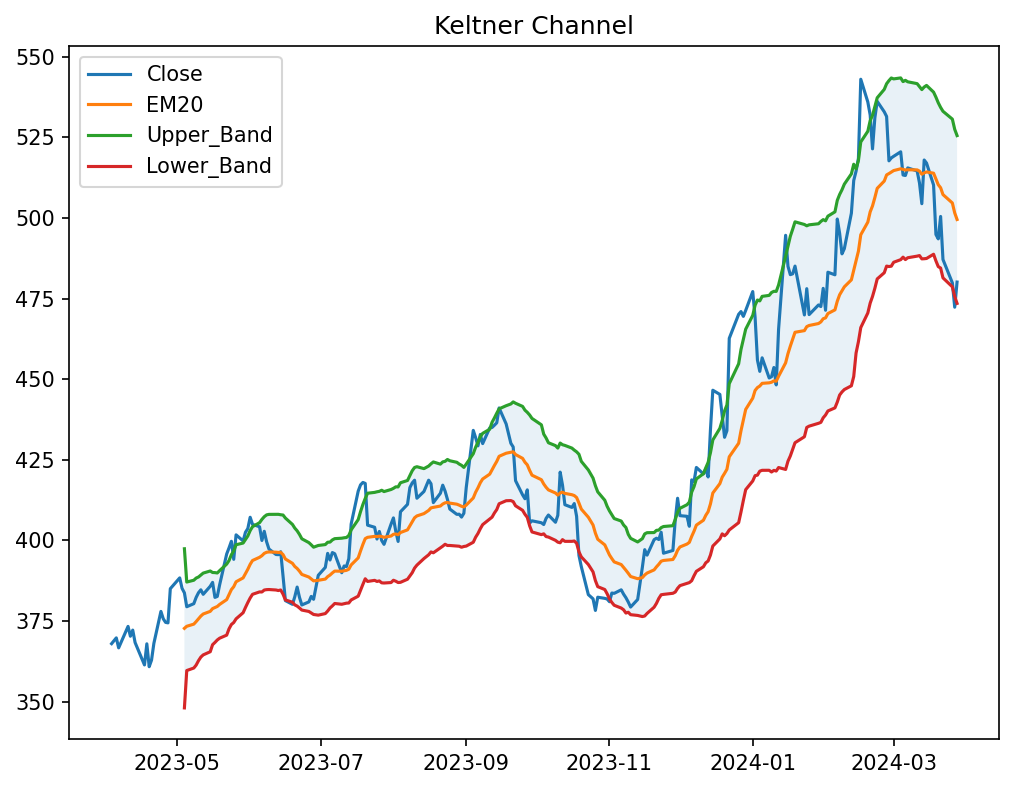

In [31]:
df["atr"]=atr(20)
df["upper_keltner_band"]=df["EMA20"]+2*df["atr"]
df["lower_keltner_band"]=df["EMA20"]-2*df["atr"]
plt.figure(figsize=(8,6),dpi=150)
plt.title("Keltner Channel")
plt.plot(df["Close"],label="Close")
plt.plot(df["EMA20"],label="EM20")
plt.plot(df["upper_keltner_band"],label="Upper_Band")
plt.plot(df["lower_keltner_band"],label="Lower_Band")
plt.legend()
plt.fill_between(df.index,df["upper_keltner_band"],df["lower_keltner_band"],alpha=0.1)

SuperTrend

In [32]:
def supertrend(multiplier,time_period):
    df["maxhigh"]=df["High"].rolling(window=time_period).max()
    df["minhigh"]=df["Low"].rolling(window=time_period).min()
    df["supertrend"]=0.5*(df["maxhigh"]+df["minhigh"])+multiplier*atr(time_period)
    return df["supertrend"]


In [33]:
supertrend(1,14)

Date
2023-04-03           NaN
2023-04-05           NaN
2023-04-06           NaN
2023-04-10           NaN
2023-04-11           NaN
                 ...    
2024-03-21    520.617885
2024-03-22    516.739301
2024-03-26    514.828574
2024-03-27    510.917866
2024-03-28    510.625011
Name: supertrend, Length: 243, dtype: float64

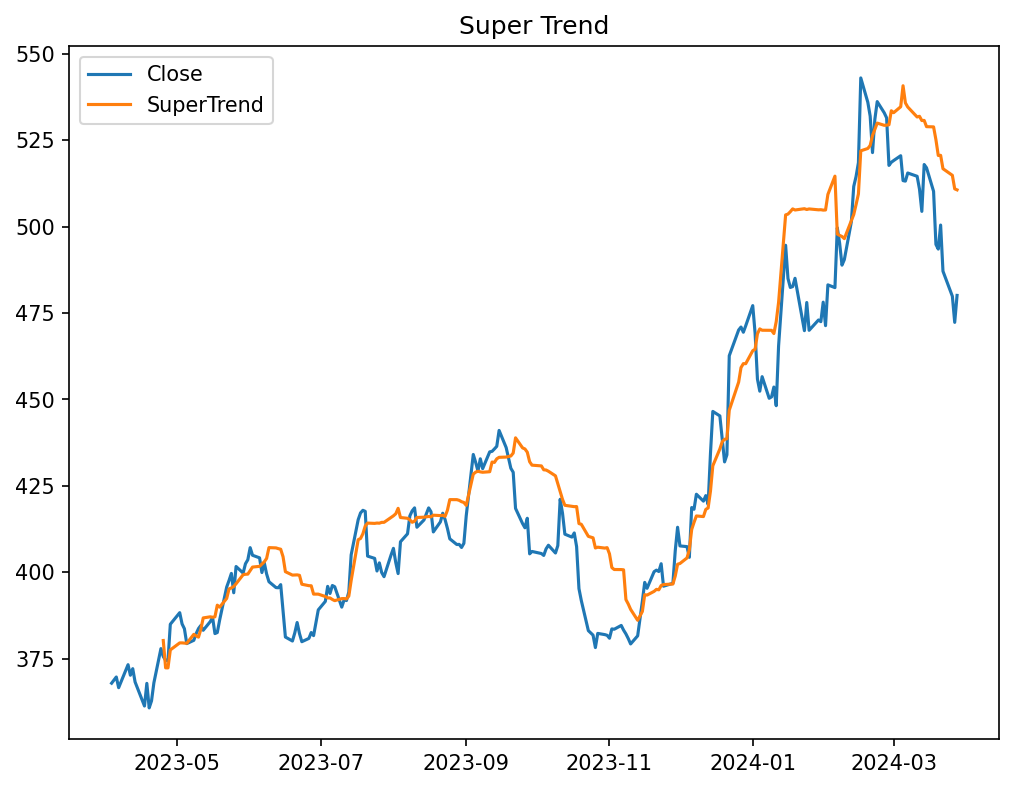

In [34]:
plt.figure(figsize=(8,6),dpi=150)
plt.title("Super Trend")
plt.plot(df["Close"],label="Close")
plt.plot(supertrend(1,14),label="SuperTrend")
plt.legend()